In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('/content/train_data.csv')
test = pd.read_csv('/content/test_data.csv')
dictionary = pd.read_csv('/content/train_data_dictionary.csv')
sample = pd.read_csv('/content/sample_sub.csv')

In [ ]:
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
train.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

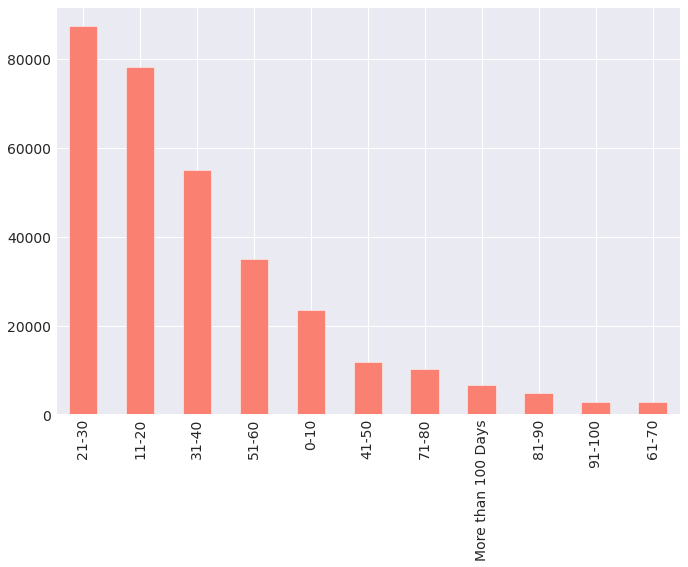

In [ ]:
# Distribution of target feature
plt.figure(figsize=(10,7))
train.Stay.value_counts().plot(kind="bar", color = ['Salmon'])

In [ ]:
# Check for null values
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [ ]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [ ]:
#Dividing into categorical and numerical data
cat_cols=[]
num_cols=[]

for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)

for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)

print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


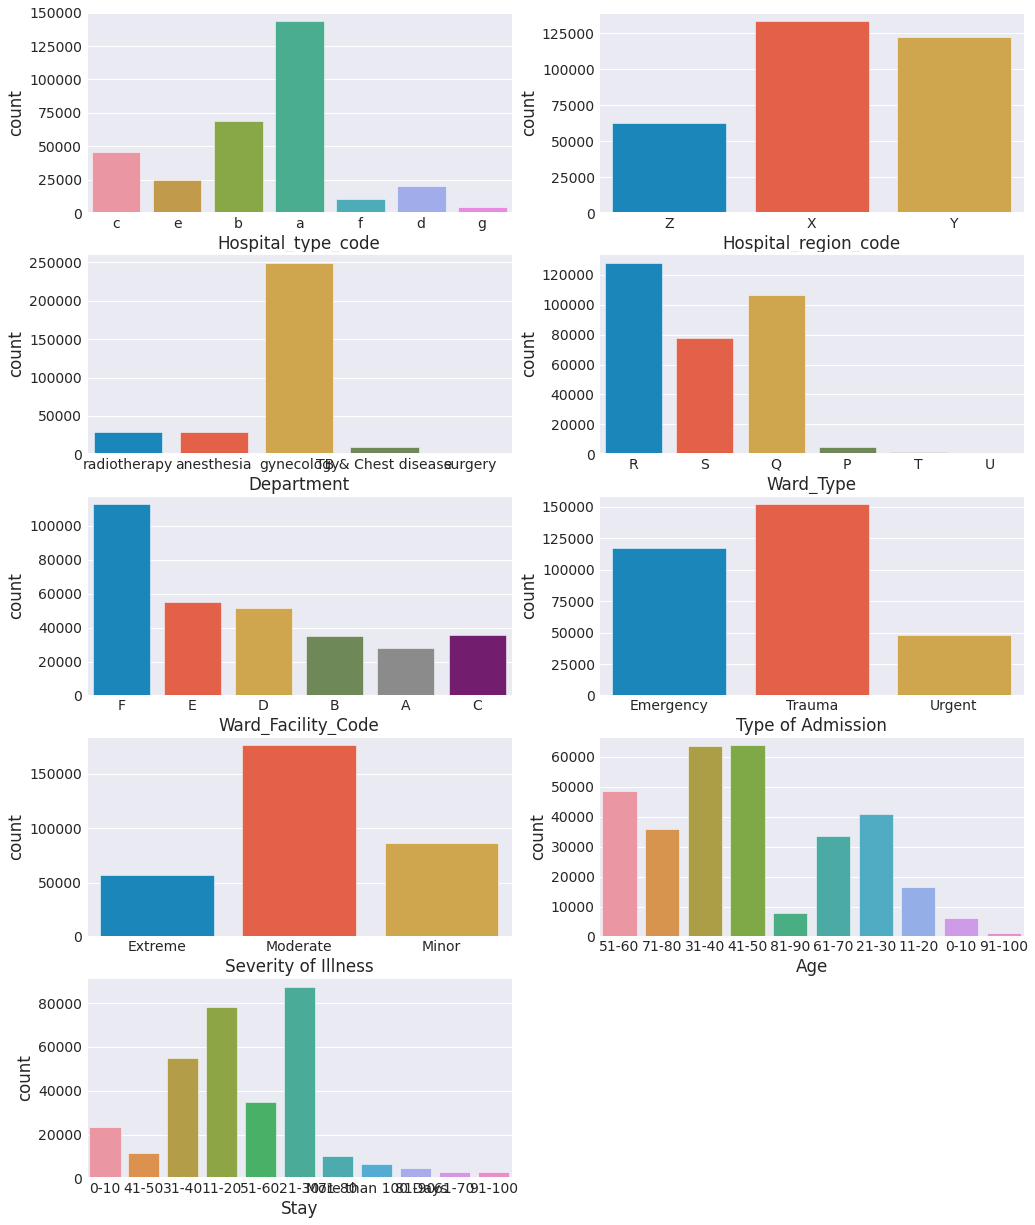

In [ ]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

In [ ]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [ ]:
train['Stay'].replace('More than 100 Days', '>100', inplace=True)

In [ ]:
train['Stay'].value_counts()

21-30     87491
11-20     78139
31-40     55159
51-60     35018
0-10      23604
41-50     11743
71-80     10254
>100       6683
81-90      4838
91-100     2765
61-70      2744
Name: Stay, dtype: int64

In [ ]:


train['Stay']= train['Stay'].replace({'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':1, '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'>100':2})

Dividing the Labels
Here, I divide the stay duration into 3 categories 0: 0-20 days 1: 21-60 days 2: 61-100+ days

You might say why a disproportionate distribution. This is to balance the number of patients in each category

Plus the model will not give good prediction accuracy if there are 11 classes to predict. It would have given good results if there were a proportionate number of rows give, example 1,000,000 but with the amount of data we have, we can get a decent accuracy with 3 labels to predict.

In [ ]:
train['Stay'].value_counts()

1    154393
0    101743
2     62302
Name: Stay, dtype: int64

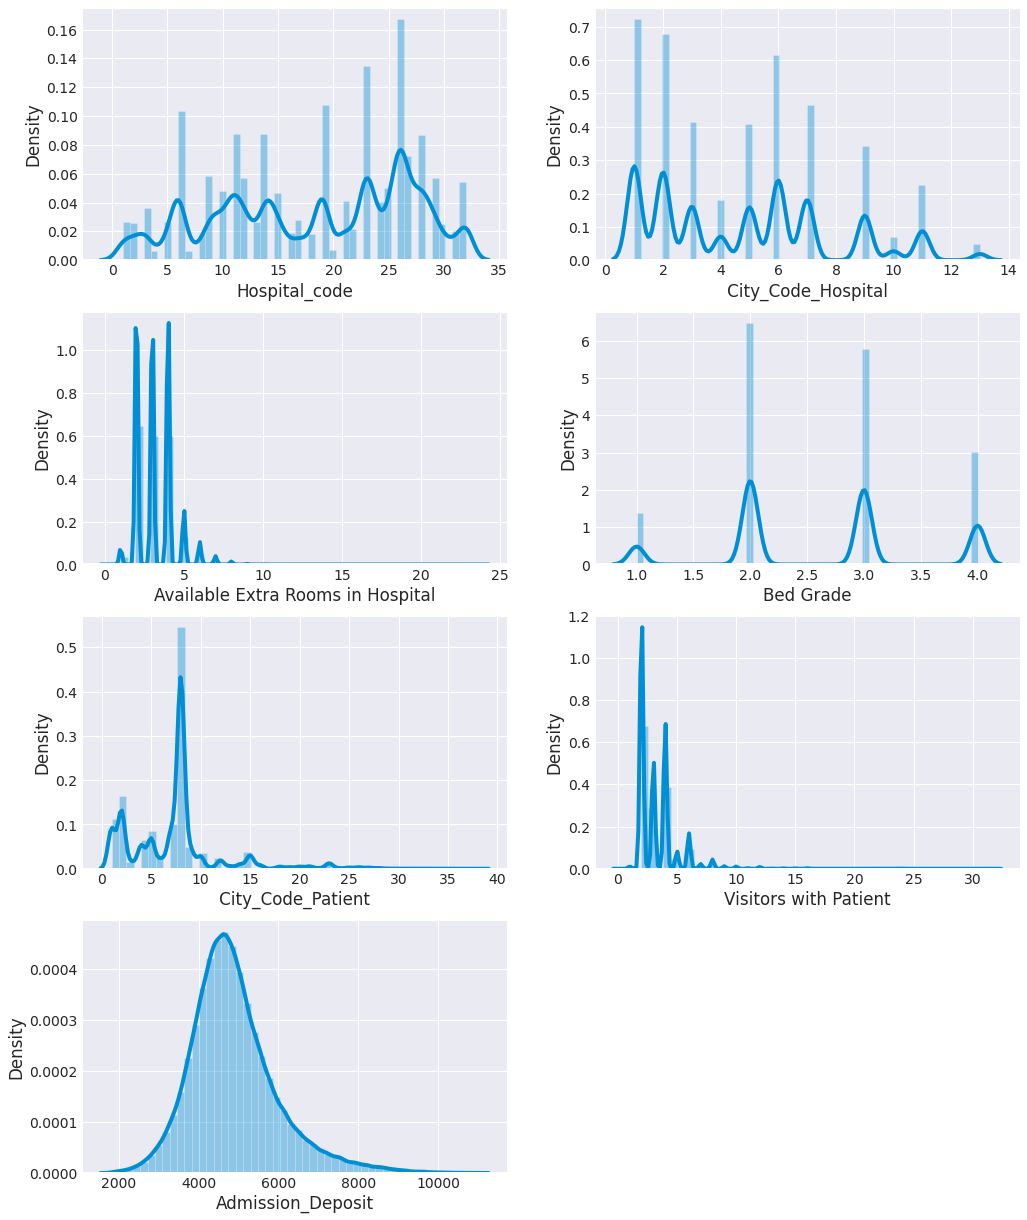

In [ ]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.distplot(train[col])
    i=i+1

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
cat_cols.append('Bed Grade')
cat_cols.append('City_Code_Hospital')
cat_cols.append('City_Code_Patient')
for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [ ]:
train[cat_cols]

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay,Bed Grade,City_Code_Hospital,City_Code_Patient
0,2,2,3,2,5,0,0,5,0,1,2,6
1,2,2,3,3,5,1,0,5,1,1,4,6
2,4,0,1,3,4,1,0,5,1,1,0,6
3,1,1,3,2,3,1,0,5,1,1,1,6
4,1,1,3,3,3,1,0,5,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
318433,0,0,3,1,5,0,2,4,0,3,5,21
318434,0,0,1,1,4,2,2,8,1,3,0,7
318435,0,0,2,2,5,0,1,7,0,3,3,9
318436,1,1,1,1,3,1,1,1,0,2,1,7


In [ ]:
train['City_Code_Hospital'].value_counts()

0     55351
1     51809
5     46991
6     35463
2     31569
4     31105
7     26277
9     17137
3     13857
8      5249
10     3630
Name: City_Code_Hospital, dtype: int64

In [ ]:
num_cols.remove('Bed Grade')
num_cols.remove('City_Code_Hospital')
num_cols.remove('City_Code_Patient')
num_cols

['Hospital_code',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

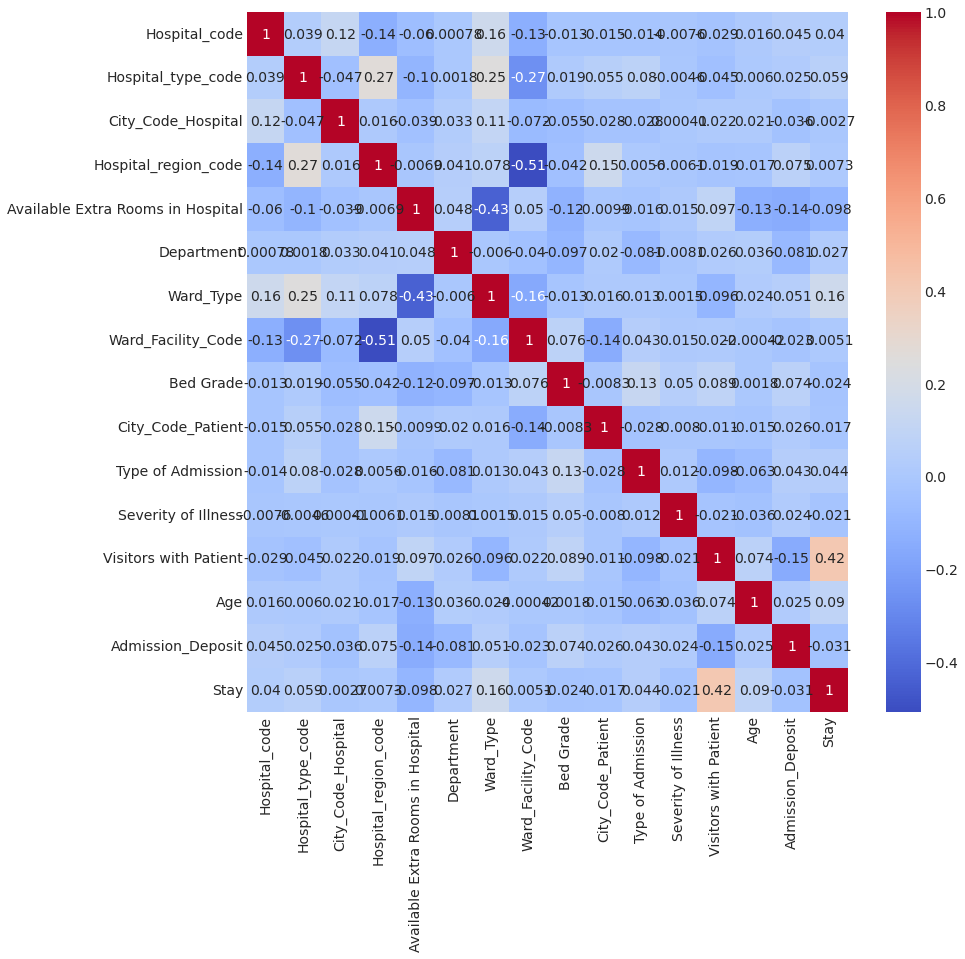

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

train[num_cols]= ss.fit_transform(train[num_cols].values)

In [ ]:
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195176,2,2,2,-0.169177,3,2,5,1,6,0,0,-0.727923,5,0.027835,0
1,-1.890124,2,4,2,-1.025217,3,3,5,1,6,1,0,-0.727923,5,0.987556,1
2,-0.963527,4,0,0,-1.025217,1,3,4,1,6,1,0,-0.727923,5,-0.124910,1
3,0.889668,1,1,1,-1.025217,3,2,3,1,6,1,0,-0.727923,5,2.200319,1
4,0.889668,1,1,1,-1.025217,3,3,3,1,6,1,0,-0.727923,5,0.623175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,-1.426825,0,5,0,-0.169177,3,1,5,3,21,0,2,-0.161049,4,-0.677923,0
318434,0.658018,0,0,0,-1.025217,1,1,4,3,7,2,2,0.405826,8,1.673071,1
318435,-1.311001,0,3,0,-0.169177,2,2,5,3,9,0,1,-0.161049,7,-0.594189,0
318436,-0.847702,1,1,1,-0.169177,1,1,3,2,7,1,1,0.972701,1,-1.030342,0


In [ ]:
from sklearn.model_selection import train_test_split

y= train['Stay']
X= train.drop('Stay', axis=1)

In [ ]:
y

0         0
1         1
2         1
3         1
4         1
         ..
318433    0
318434    1
318435    0
318436    0
318437    0
Name: Stay, Length: 318438, dtype: int64

In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

Building Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier',  'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.5627590754930285
RandomForsetClassifier
0.598762718251476
DecisionTreeClassifier
0.5214012058786585
KNeighborsClassifier
0.5556462755935184
XGBClassifier
0.6032219570405728


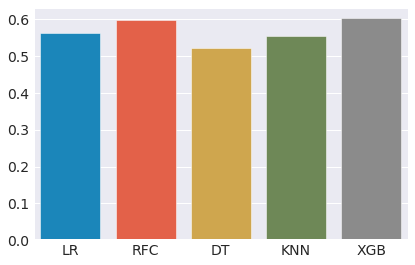

In [ ]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores)

In [ ]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, objective=binary:logistic, subsample=0.6;, score=0.627 total time= 3.9min
[CV 2/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, objective=binary:logistic, subsample=0.6;, score=0.620 total time= 3.8min
[CV 3/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, objective=binary:logistic, subsample=0.6;, score=0.608 total time= 3.8min
[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, objective=binary:logistic, subsample=0.8;, score=0.633 total time= 5.1min
[CV 2/3] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, objective=binary:logistic, subsample=0.8;, score=0.626 total time= 5.2min
[CV 3/3] END colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, objective=binary:logistic, subsample=0.8;, score=0.613 total time= 5.2min
[CV 1/3] END colsample_bytree=0.8,

RandomizedSearchCV(cv=3, estimator=XGBClassifier(n_estimators=600), n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 5, 10, 12],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=3)

In [ ]:
grid.best_score_

0.6255032376789202

In [ ]:
grid.best_estimator_

XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=12,
              n_estimators=600, objective='multi:softprob', subsample=0.6)

In [ ]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6439203617635976
[[10095  9637   617]
 [ 5507 22391  2981]
 [  636  3300  8524]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55     20349
           1       0.63      0.73      0.68     30879
           2       0.70      0.68      0.69     12460

    accuracy                           0.64     63688
   macro avg       0.65      0.64      0.64     63688
weighted avg       0.64      0.64      0.64     63688



In [ ]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [ ]:
test['Bed Grade'].fillna(statistics.mode(test['Bed Grade']),inplace=True)
test['City_Code_Patient'].fillna(statistics.mode(test['City_Code_Patient']),inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137057 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [ ]:
test.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [ ]:
cat_cols.remove('Stay')
for col in cat_cols:

    test[col]= le.fit_transform(test[col])

In [ ]:
test[num_cols]= ss.transform(test[num_cols].values)

In [ ]:
test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.310544,2,2,2,-0.169177,2,3,0,1,1,0,2,-0.727923,7,-1.643165
1,1.237141,0,3,0,-1.025217,2,3,5,1,1,1,2,0.405826,7,-0.793862
2,0.889668,1,1,1,-0.169177,2,1,3,3,1,0,2,-0.161049,7,-0.357709
3,-1.426825,0,5,0,-0.169177,2,1,5,1,1,1,2,-0.161049,7,-0.651238
4,1.121317,1,9,0,-1.025217,2,2,5,1,1,1,2,0.405826,7,-0.662280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,-0.847702,1,1,1,0.686863,1,1,3,2,2,0,1,0.405826,4,1.317891
137053,0.773843,4,0,0,-1.025217,3,2,4,3,6,0,2,-0.727923,0,-1.261301
137054,1.352966,2,2,2,-1.025217,1,2,0,3,11,2,1,-0.727923,0,2.124866
137055,-1.542650,0,0,0,-1.025217,1,2,4,3,9,1,1,-0.727923,4,0.509996


In [ ]:
predictions= grid.best_estimator_.predict(test)

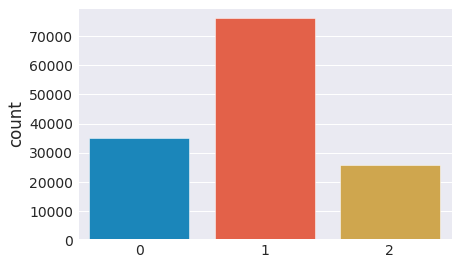

In [ ]:
sns.countplot(predictions)

In [ ]:
submission= pd.read_csv('/content/sample_sub.csv')

In [ ]:
submission.head()


,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [ ]:
submission['Stay']= predictions

In [ ]:
submission['Stay']= submission['Stay'].replace({0:'Less than 20 days', 1:'21-50 days', 2:'51-100+ days'})

In [ ]:
submission

,case_id,Stay
0,318439,Less than 20 days
1,318440,51-100+ days
2,318441,21-50 days
3,318442,21-50 days
4,318443,51-100+ days
...,...,...
137052,455491,21-50 days
137053,455492,Less than 20 days
137054,455493,21-50 days
137055,455494,Less than 20 days
